In [1]:
library(tidyverse)
install.packages("lubridate")  
library(lubridate)
library(dplyr)
library(readr)
library(ggplot2)

players <- read_csv("/home/jovyan/work/dsci-100-student/project/players.csv")
sessions <- read_csv("/home/jovyan/work/dsci-100-student/project/sessions.csv")

merged_data <- left_join(players,sessions, by = "hashedEmail")

merged_data <- merged_data|>
    select(-hashedEmail,-original_start_time,-original_end_time)
    merged_data$Age[is.na(merged_data$Age)] <- mean(merged_data$Age, na.rm = TRUE)

merged_data


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Colum

experience,subscribe,played_hours,name,gender,Age,start_time,end_time
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 00:21,08/08/2024 01:35
Pro,TRUE,30.3,Morgan,Male,9,09/09/2024 22:30,09/09/2024 22:37
Pro,TRUE,30.3,Morgan,Male,9,08/08/2024 02:41,08/08/2024 03:25
Pro,TRUE,30.3,Morgan,Male,9,10/09/2024 15:07,10/09/2024 15:29
Pro,TRUE,30.3,Morgan,Male,9,05/05/2024 22:21,05/05/2024 23:17
Pro,TRUE,30.3,Morgan,Male,9,06/04/2024 22:24,06/04/2024 23:33
Pro,TRUE,30.3,Morgan,Male,9,20/04/2024 20:46,20/04/2024 21:48
Pro,TRUE,30.3,Morgan,Male,9,15/06/2024 16:37,15/06/2024 18:37
Pro,TRUE,30.3,Morgan,Male,9,05/05/2024 23:40,06/05/2024 00:55


To get a large amount of data, total sessions, total play time, and average session duration are key indicators.  
Let’s call these **engagement level metrics**.

1. Relation between "age" and engagement level metrics  
    > Do older players spend more time per session? (age vs average session duration)

2. Relation between "experience" and engagement level metrics  
    > Do players with more experience tend to play more? (experience vs Avergae Played Hours)

3. Relation between "gender" and engagement level metrics  
    > Which gender has more sessions? (gender vs total sessions)

4. Relation between "subscription" and engagement level metrics  
    > Do subscribers tend to play more than non-subscribers? (subscribe vs total play time)


**1. Do older players spend more time per session? (age vs average session duration)**

In [3]:
merged_data <- merged_data|>
    mutate(
        start_time = as.POSIXct(start_time, format = "%m/%d/%Y %H:%M"),
        end_time = as.POSIXct(end_time, format = "%m/%d/%Y %H:%M"),
        session_duration = as.numeric(difftime(end_time, start_time, units = "mins"))
    )

# Outliers were detected.(start_time,end time)
# Checking sum of all session time and duplicated session time are same.
name_order <- merged_data |>
  count(name, sort = TRUE) |>
  pull(name)

merged_data$name <- factor(merged_data$name, levels = name_order)

merged_data <- merged_data |>
  arrange(name,start_time)

# merged_data <- merged_data |>
#     filter(name == "Morgan") |>
#     arrange(start_time)
# The outliers represented non-overlapping, extremely long sessions and were unlikely to affect the analysis, so we removed them from the dataset.

merged_data_clean <- merged_data |>
  filter(session_duration <= 1440 ,!is.na(start_time),!is.na(end_time))

merged_data2 <- merged_data_clean |> 
    group_by(name,Age,experience,subscribe) |>
    summarize(average_playtime = mean(session_duration),.groups = "drop")

merged_data2 <- merged_data2 |>
    select(-name,-experience,-subscribe)

merged_data2 <- merged_data2 |>
    mutate(
        Age = as.integer(Age),
        average_playtime = round(average_playtime,2)
    ) |>
    arrange(Age)

average_by_age <- merged_data2|> 
    group_by(Age) |>
    summarize(average_playtime = mean(average_playtime),.groups = "drop")

average_by_age <- average_by_age |> 
    mutate(
        average_playtime = round(average_playtime)
    )

average_by_age


Age,average_playtime
<int>,<dbl>
9,57
10,17
11,18
12,34
14,20
16,23
17,34
18,16
19,27


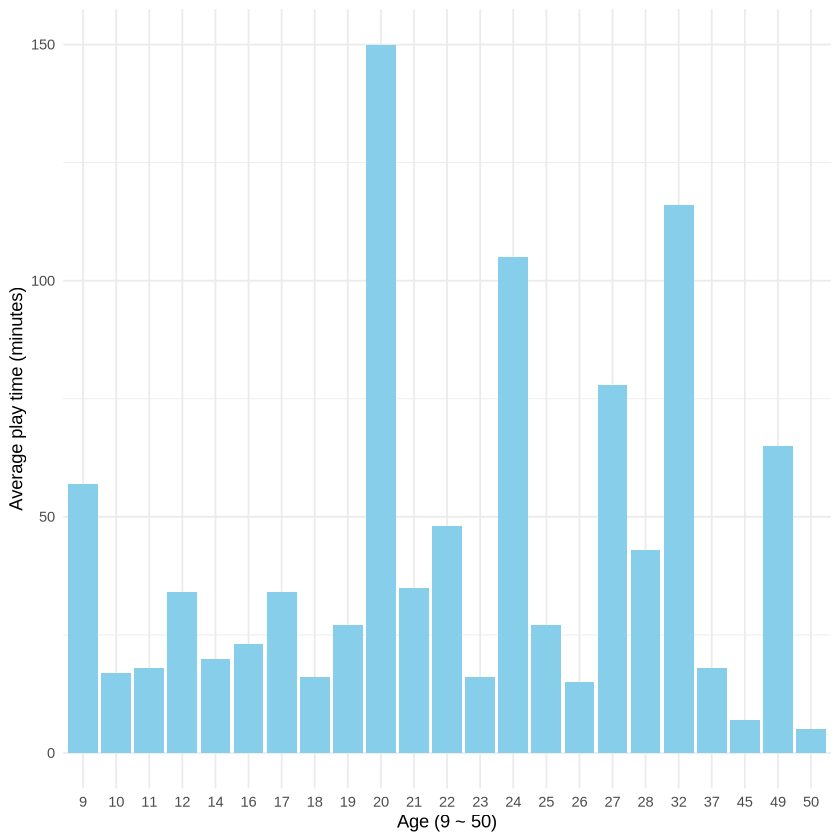

In [4]:
library(ggplot2)

age_plot <- average_by_age |>
    ggplot(aes(x = factor(Age), y = average_playtime)) +
    geom_bar(stat = "identity", fill = "skyblue") + 
    labs(
        x = "Age (9 ~ 50)",
        y = "Average play time (minutes)",
        tittle = "Relationship Between Age and Average Play Time"
    ) +
    theme_minimal() 

age_plot

In [5]:
merged_data2 <- merged_data2 |>
  mutate(age_group = case_when(
    Age >= 10 & Age < 20 ~ "10s",
    Age >= 20 & Age < 30 ~ "20s",
    Age >= 30 & Age < 40 ~ "30s",
    Age >= 40 & Age <= 59 ~ "40s~50s",
    TRUE ~ NA_character_
  ))

merged_data2

grouped_playtime <- merged_data2 |>
  filter(!is.na(age_group)) |>
  group_by(age_group) |>
  summarize(avg_playtime = round(mean(average_playtime), 2))


Age,average_playtime,age_group
<int>,<dbl>,<chr>
9,57.28,NA
10,17.00,10s
11,18.00,10s
12,34.00,10s
14,30.14,10s
14,9.00,10s
16,54.10,10s
16,8.00,10s
16,6.00,10s


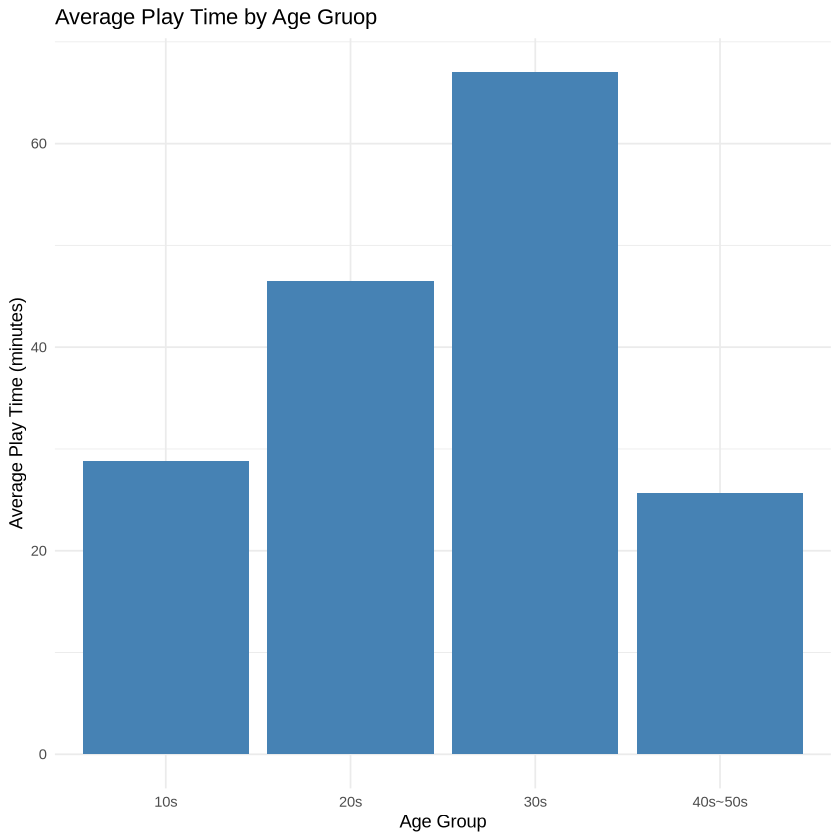

In [6]:
ggplot(grouped_playtime, aes(x = age_group, y = avg_playtime)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Average Play Time by Age Gruop ",
       x = "Age Group",
       y = "Average Play Time (minutes)") +
  theme_minimal()
